In [228]:
# import required packages 
using DataFrames
using FreqTables
using Plots, StatPlots
using DecisionTree
using StatsModels
using MLDataUtils

#Set the backend as matplotlib.pyplot
pyplot()

Plots.PyPlotBackend()

In [229]:
# Read Dataset
data = readtable("C:/Users/veer/Desktop/Projects/Julia_In_Banking/Data/loan_data.csv")

,loan_id,member_id,home_ownership,annual_inc,loan_status,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job
1,57245,138150,OWN,54000.0,Fully Paid,1200.0,36 months,0.1311,679,0,36,5,married,freelance
2,61390,182594,MORTGAGE,148000.0,Fully Paid,4000.0,36 months,0.0788,729,0,25,8,single,partime
3,61419,182917,RENT,45000.0,Charged Off,5600.0,36 months,0.1496,669,0,22,2,married,fixed
4,62102,191024,RENT,54000.0,Fully Paid,3200.0,36 months,0.0988,744,0,25,4,married,fixed
5,66943,247802,RENT,24000.0,Fully Paid,2800.0,60 months,0.1149,709,0,26,17,married,fixed
6,68163,258249,MORTGAGE,100000.0,Fully Paid,3000.0,36 months,0.0714,749,0,22,8,married,freelance
7,69990,275254,RENT,125000.0,Fully Paid,15500.0,36 months,0.0788,784,1,29,3,single,freelance
8,290807,290804,RENT,84996.0,Fully Paid,15000.0,36 months,0.157,674,1,29,13,separated,freelance
9,347648,348254,RENT,60000.0,Fully Paid,10000.0,36 months,0.1273,714,0,22,15,single,fixed
10,348340,349269,RENT,71000.0,Fully Paid,8000.0,36 months,0.1112,714,0,26,5,married,fixed


In [230]:
# Create 02 categories for loan status
data[:loan_status_new] = ifelse.(data[:loan_status] .== "Fully Paid",0,1)
delete!(data,:loan_status)

,loan_id,member_id,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status_new
1,57245,138150,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,61390,182594,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,61419,182917,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,62102,191024,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,66943,247802,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,68163,258249,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,69990,275254,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,290807,290804,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,347648,348254,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,348340,349269,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [231]:
rename!(data, :loan_status_new, :loan_status)

,loan_id,member_id,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status
1,57245,138150,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,61390,182594,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,61419,182917,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,62102,191024,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,66943,247802,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,68163,258249,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,69990,275254,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,290807,290804,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,347648,348254,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,348340,349269,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [232]:
# Delete Loan ID and Customer ID columns
delete!(data,:loan_id)
delete!(data,:member_id)

,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status
1,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [233]:
# Explore Loan Amount
freqtable(data[:loan_status])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0     │ 9113
1     │ 1429

In [234]:
describe(data[:annual_inc])

Summary Stats:
Mean:           68835.898406
Minimum:        4080.000000
1st Quartile:   40000.000000
Median:         57600.000000
3rd Quartile:   81000.000000
Maximum:        6000000.000000
Length:         10542
Type:           Float64
Number Missing: 0
% Missing:      0.000000


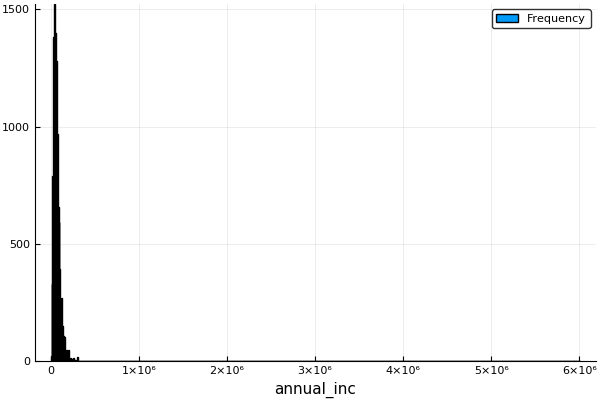

In [235]:
# Plot Histogram for Applicant Income
Plots.histogram(data[:annual_inc], bins = 1000, xlabel = "annual_inc", labels = "Frequency")

In [236]:
eltypes(data)

12-element Array{Type,1}:
 String 
 Float64
 Float64
 String 
 Float64
 Int64  
 Int64  
 Int64  
 Int64  
 String 
 String 
 Int64  

In [237]:
freqtable(data[:home_ownership])

3-element Named Array{Int64,1}
Dim1     │ 
─────────┼─────
MORTGAGE │ 4540
OWN      │  883
RENT     │ 5119

In [239]:
# Label Encoding-- Home Ownership
data[:Rent] = ifelse.(data[:home_ownership] .== "RENT",1,0)
data[:Mortgage] = ifelse.(data[:home_ownership] .== "MORTGAGE",1,0) # Zero values for both the home ownership type show OWN type
delete!(data,:home_ownership)

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status,_36_months,Rent,Mortgage
1,54000.0,1200.0,0.1311,679,0,36,5,married,freelance,0,1,0,0
2,148000.0,4000.0,0.0788,729,0,25,8,single,partime,0,1,0,1
3,45000.0,5600.0,0.1496,669,0,22,2,married,fixed,1,1,1,0
4,54000.0,3200.0,0.0988,744,0,25,4,married,fixed,0,1,1,0
5,24000.0,2800.0,0.1149,709,0,26,17,married,fixed,0,0,1,0
6,100000.0,3000.0,0.0714,749,0,22,8,married,freelance,0,1,0,1
7,125000.0,15500.0,0.0788,784,1,29,3,single,freelance,0,1,1,0
8,84996.0,15000.0,0.157,674,1,29,13,separated,freelance,0,1,1,0
9,60000.0,10000.0,0.1273,714,0,22,15,single,fixed,0,1,1,0
10,71000.0,8000.0,0.1112,714,0,26,5,married,fixed,0,1,1,0


In [238]:
# Label Encoding-- term
data[:_36_months] = ifelse.(data[:term] .== "36 months",1,0)
delete!(data,:term)

,home_ownership,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status,_36_months
1,OWN,54000.0,1200.0,0.1311,679,0,36,5,married,freelance,0,1
2,MORTGAGE,148000.0,4000.0,0.0788,729,0,25,8,single,partime,0,1
3,RENT,45000.0,5600.0,0.1496,669,0,22,2,married,fixed,1,1
4,RENT,54000.0,3200.0,0.0988,744,0,25,4,married,fixed,0,1
5,RENT,24000.0,2800.0,0.1149,709,0,26,17,married,fixed,0,0
6,MORTGAGE,100000.0,3000.0,0.0714,749,0,22,8,married,freelance,0,1
7,RENT,125000.0,15500.0,0.0788,784,1,29,3,single,freelance,0,1
8,RENT,84996.0,15000.0,0.157,674,1,29,13,separated,freelance,0,1
9,RENT,60000.0,10000.0,0.1273,714,0,22,15,single,fixed,0,1
10,RENT,71000.0,8000.0,0.1112,714,0,26,5,married,fixed,0,1


In [240]:
# Label Encoding-- marital
data[:married] = ifelse.(data[:marital] .== "married",1,0)
data[:single] = ifelse.(data[:marital] .== "single",1,0)
delete!(data,:marital)

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,job,loan_status,_36_months,Rent,Mortgage,married,single
1,54000.0,1200.0,0.1311,679,0,36,5,freelance,0,1,0,0,1,0
2,148000.0,4000.0,0.0788,729,0,25,8,partime,0,1,0,1,0,1
3,45000.0,5600.0,0.1496,669,0,22,2,fixed,1,1,1,0,1,0
4,54000.0,3200.0,0.0988,744,0,25,4,fixed,0,1,1,0,1,0
5,24000.0,2800.0,0.1149,709,0,26,17,fixed,0,0,1,0,1,0
6,100000.0,3000.0,0.0714,749,0,22,8,freelance,0,1,0,1,1,0
7,125000.0,15500.0,0.0788,784,1,29,3,freelance,0,1,1,0,0,1
8,84996.0,15000.0,0.157,674,1,29,13,freelance,0,1,1,0,0,0
9,60000.0,10000.0,0.1273,714,0,22,15,fixed,0,1,1,0,0,1
10,71000.0,8000.0,0.1112,714,0,26,5,fixed,0,1,1,0,1,0


In [241]:
# Label Encoding-- marital
data[:job_fixed] = ifelse.(data[:job] .== "fixed",1,0)
data[:job_freelance] = ifelse.(data[:job] .== "freelance",1,0)
data[:job_parttime] = ifelse.(data[:job] .== "partime",1,0)
delete!(data,:job)

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,loan_status,_36_months,Rent,Mortgage,married,single,job_fixed,job_freelance,job_parttime
1,54000.0,1200.0,0.1311,679,0,36,5,0,1,0,0,1,0,0,1,0
2,148000.0,4000.0,0.0788,729,0,25,8,0,1,0,1,0,1,0,0,1
3,45000.0,5600.0,0.1496,669,0,22,2,1,1,1,0,1,0,1,0,0
4,54000.0,3200.0,0.0988,744,0,25,4,0,1,1,0,1,0,1,0,0
5,24000.0,2800.0,0.1149,709,0,26,17,0,0,1,0,1,0,1,0,0
6,100000.0,3000.0,0.0714,749,0,22,8,0,1,0,1,1,0,0,1,0
7,125000.0,15500.0,0.0788,784,1,29,3,0,1,1,0,0,1,0,1,0
8,84996.0,15000.0,0.157,674,1,29,13,0,1,1,0,0,0,0,1,0
9,60000.0,10000.0,0.1273,714,0,22,15,0,1,1,0,0,1,1,0,0
10,71000.0,8000.0,0.1112,714,0,26,5,0,1,1,0,1,0,1,0,0


In [242]:
# Partition Data into Train and Test datasets
function partitionTrainTest(data, at = 0.7)
    n = nrow(data)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    data[train_idx,:], data[test_idx,:]
end

train,test = partitionTrainTest(data, 0.7) # 70% train

(7379×16 DataFrames.DataFrame
│ Row  │ annual_inc │ loan_amnt │ int_rate │ cibil_score │ inq_last_6mths │
├──────┼────────────┼───────────┼──────────┼─────────────┼────────────────┤
│ 1    │ 71000.0    │ 20000.0   │ 0.1136   │ 719         │ 1              │
│ 2    │ 93600.0    │ 22000.0   │ 0.1979   │ 674         │ 1              │
│ 3    │ 39996.0    │ 8000.0    │ 0.0714   │ 749         │ 1              │
│ 4    │ 33204.0    │ 2000.0    │ 0.1472   │ 679         │ 0              │
│ 5    │ 10200.0    │ 5500.0    │ 0.1036   │ 689         │ 0              │
│ 6    │ 150000.0   │ 8750.0    │ 0.0774   │ 784         │ 0              │
│ 7    │ 130000.0   │ 25000.0   │ 0.1496   │ 704         │ 0              │
│ 8    │ 55493.0    │ 15250.0   │ 0.1311   │ 694         │ 1              │
│ 9    │ 25000.0    │ 1000.0    │ 0.1595   │ 664         │ 1              │
│ 10   │ 62000.0    │ 10000.0   │ 0.0788   │ 754         │ 1              │
│ 11   │ 102400.0   │ 25000.0   │ 0.1036   │ 724         │

In [243]:
# Missing value imputation- train dataset
# Replace missing loan amount with median of loan amount
showcols(train)
train[isna.(train[:emp_length]),:emp_length] = floor(median(dropna(train[:emp_length])))

7379×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 99      │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ _36_months     │ Int64   │ 0       │
│ 10    │ Rent           │ Int64   │ 0       │
│ 11    │ Mortgage       │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

5.0

In [251]:
# Missing value imputation-- test dataset
# Replace missing loan amount with median of loan amount
showcols(test)
test[isna.(test[:emp_length]),:emp_length] = floor(median(dropna(test[:emp_length])))

3163×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 62      │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ _36_months     │ Int64   │ 0       │
│ 10    │ Rent           │ Int64   │ 0       │
│ 11    │ Mortgage       │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

4.0

In [244]:
showcols(train)

7379×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 0       │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ _36_months     │ Int64   │ 0       │
│ 10    │ Rent           │ Int64   │ 0       │
│ 11    │ Mortgage       │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

In [252]:
showcols(test)

3163×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 0       │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ _36_months     │ Int64   │ 0       │
│ 10    │ Rent           │ Int64   │ 0       │
│ 11    │ Mortgage       │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

In [253]:
y_train = train[:,:loan_status]
X_train = train[:,[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16]]
y_test = test[:,:loan_status]
X_test = test[:,[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16]]

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,_36_months,Rent,Mortgage,married,single,job_fixed,job_freelance,job_parttime
1,21600.0,2500.0,0.1435,679,0,24,4,1,1,0,0,1,1,0,0
2,55000.0,12000.0,0.1459,689,0,27,7,1,1,0,1,0,1,0,0
3,60000.0,9600.0,0.1372,699,1,30,4,0,1,0,1,0,0,0,1
4,54000.0,12000.0,0.1136,744,0,29,17,1,1,0,1,0,0,1,0
5,40000.0,2000.0,0.1472,744,0,23,1,1,1,0,0,1,1,0,0
6,203000.0,25000.0,0.2164,674,1,25,2,1,1,0,1,0,0,1,0
7,300000.0,25000.0,0.1793,679,0,31,1,1,1,0,1,0,0,1,0
8,25000.0,4000.0,0.1261,704,0,24,4,0,1,0,1,0,0,0,0
9,62500.0,24250.0,0.1062,754,1,25,0,1,1,0,1,0,1,0,0
10,70000.0,6000.0,0.0542,799,1,26,12,1,0,1,1,0,1,0,0


In [254]:
# Undersampling the training dataset
X_train, y_train = undersample((X_train, y_train), shuffle = true)

(2004×15 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row  │ annual_inc │ loan_amnt │ int_rate │ cibil_score │ inq_last_6mths │
├──────┼────────────┼───────────┼──────────┼─────────────┼────────────────┤
│ 1    │ 55000.0    │ 3600.0    │ 0.1398   │ 674         │ 1              │
│ 2    │ 82000.0    │ 8000.0    │ 0.1348   │ 689         │ 0              │
│ 3    │ 21600.0    │ 7000.0    │ 0.1979   │ 679         │ 0              │
│ 4    │ 60000.0    │ 12000.0   │ 0.0542   │ 774         │ 0              │
│ 5    │ 80004.0    │ 19000.0   │ 0.1062   │ 749         │ 1              │
│ 6    │ 75000.0    │ 10000.0   │ 0.0654   │ 734         │ 0              │
│ 7    │ 54000.0    │ 6000.0    │ 0.0617   │ 744         │ 1              │
│ 8    │ 48000.0    │ 4000.0    │ 0.1273   │ 724         │ 0              │
│ 9    │ 40000.0    │ 25000.0   │ 0.1036   │ 769         │ 1              │
│ 10   │ 16800.0    │ 5000.0    │ 0.1398   │ 679         │ 0              │
│ 11   │ 30000.0    │ 10000.0   │ 0.075

In [255]:
# Convert all the datasets in to arrays
# Convert data types for all the columns in training dataset to float type
for c = eachcol(X_train)
  if eltype(c[2]) <: Integer
    X_train[c[1]] = X_train[c[1]] .* 1.0
  end
end

for c = eachcol(X_test)
  if eltype(c[2]) <: Integer
    X_test[c[1]] = X_test[c[1]] .* 1.0
  end
end

X_train1 = convert(Array, X_train)
X_test1 = convert(Array, X_test)
y_train1 = convert(Array, y_train)
y_test1 = convert(Array, y_test)

3163-element Array{Int64,1}:
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 1
 0

In [271]:
# Build a standard scaler
type StandardScalar
    mean::Vector{Float64}
    std::Vector{Float64}
end

# Helper function to initialize an empty scalar
function StandardScalar()
    StandardScalar(Array(Real,0),Array(Real,0))
end

# Compute mean and standard deviation of each column
function fit_std_scalar!(std_scalar::StandardScalar,X::Matrix{Real})
    n_rows, n_cols = size(X)
    std_scalar.std = zeros(n_cols)
    std_scalar.mean = zeros(n_cols)
    # for loops are fast again!
    for i = 1:n_cols
        std_scalar.mean[i] = mean(X[:,i])
        std_scalar.std[i] = std(X[:,i])
    end
end

function transform(std_scalar::StandardScalar,X::Matrix{Real})
    (X .- std_scalar.mean') ./ std_scalar.std' # broadcasting
end

# fit and transform in one function
function fit_transform!(std_scalar::StandardScalar,X::Matrix{Real})
    fit_std_scalar!(std_scalar,X)
    transform(std_scalar,X)
end

fit_transform! (generic function with 2 methods)

In [272]:
# Perform Standard Scaling for all X variables
std_scalar = StandardScalar()

X_train1 = fit_transform!(std_scalar,X_train1)
X_test1 = transform(std_scalar,X_test1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Real}, ::Int64) at .\deprecated.jl:57
 [3] StandardScalar() at .\In[271]:9
 [4] include_string(::String, ::String) at .\loading.jl:522
 [5] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [9] (::IJulia.##14#17)() at .\task.jl:335
while loading In[272], in expression starting on line 2


3163×15 Array{Float64,2}:
 -0.678993   -1.20878     0.617367  …   0.767412  -0.557999  -0.322615
 -0.176313    0.200497    0.686914      0.767412  -0.557999  -0.322615
 -0.101062   -0.155531    0.434808     -1.30243   -0.557999   3.09813 
 -0.191363    0.200497   -0.249065     -1.30243    1.79122   -0.322615
 -0.402068   -1.28295     0.724585      0.767412  -0.557999  -0.322615
  2.05113     2.12899     2.72984   …  -1.30243    1.79122   -0.322615
  3.51101     2.12899     1.65477      -1.30243    1.79122   -0.322615
 -0.627822   -0.986264    0.113156     -1.30243   -0.557999  -0.322615
 -0.0634358   2.01773    -0.463499      0.767412  -0.557999  -0.322615
  0.0494415  -0.689574   -1.97034       0.767412  -0.557999  -0.322615
  0.199945    2.01773     1.54755   …  -1.30243    1.79122   -0.322615
 -0.632307   -1.28295     0.292818      0.767412  -0.557999  -0.322615
  1.08791     2.12899     0.686914     -1.30243    1.79122   -0.322615
  ⋮                                 ⋱              

In [273]:
labels= y_train1
features= X_train1

2004×15 Array{Float64,2}:
 -0.176313   -1.0456      0.51015   …   0.767412  -0.557999  -0.322615
  0.230045   -0.392883    0.365262      0.767412  -0.557999  -0.322615
 -0.678993   -0.541229    2.19375       0.767412  -0.557999  -0.322615
 -0.101062    0.200497   -1.97034      -1.30243    1.79122   -0.322615
  0.200005    1.23891    -0.463499      0.767412  -0.557999  -0.322615
  0.124693   -0.0961931  -1.64579   …   0.767412  -0.557999  -0.322615
 -0.191363   -0.689574   -1.75301       0.767412  -0.557999  -0.322615
 -0.281665   -0.986264    0.147929     -1.30243   -0.557999  -0.322615
 -0.402068    2.12899    -0.538841      0.767412  -0.557999  -0.322615
 -0.751235   -0.837919    0.51015      -1.30243    1.79122   -0.322615
 -0.552571   -0.0961931  -1.3647    …   0.767412  -0.557999  -0.322615
 -0.02581    -1.14944    -0.104176      0.767412  -0.557999  -0.322615
 -0.170865   -0.912092    0.113156      0.767412  -0.557999  -0.322615
  ⋮                                 ⋱              

In [278]:
# train random forest classifier
# using 2 random features, 10 trees, 0.5 portion of samples per tree (optional), and a maximum tree depth of 6 (optional)
model = build_forest(labels, features, 2, 100, 0.5, 10)

Ensemble of Decision Trees
Trees:      100
Avg Leaves: 131.48
Avg Depth:  10.0

In [279]:
# test on the Test dataset
y_pred1 = apply_forest(model, X_test1)

3163-element Array{Any,1}:
 0
 0
 1
 0
 1
 1
 1
 1
 0
 0
 1
 1
 0
 ⋮
 1
 1
 1
 0
 0
 0
 0
 0
 1
 1
 1
 0

In [280]:
freqtable(y_test1,y_pred1)

2×2 Named Array{Int64,2}
Dim1 ╲ Dim2 │    0     1
────────────┼───────────
0           │ 1926   810
1           │  167   260

In [226]:
# Pkg.add("RCall.jl")
using RCall

INFO: Package RCall is already installed
INFO: METADATA is out-of-date — you may not have the latest version of RCall
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [ ]:
saveRDS("C:/Users/veer/Desktop/Projects/Credit_Risk_Modeling/Final/JuliaModel.rds", model)